In [1]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#MEMBACA DATASET
data = pd.read_csv("dataset/creditcard.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
#MEMILIH DATA DARI DATASET UNTUK DIGUNAKAN SEBAGAI ATRIBUT X
data = data[['BALANCE', 'PURCHASES']]
data.head(10)

,BALANCE,PURCHASES
0,40.900749,95.40
1,3202.467416,0.00
2,2495.148862,773.17
3,1666.670542,1499.00
4,817.714335,16.00
5,1809.828751,1333.28
6,627.260806,7091.01
7,1823.652743,436.20
8,1014.926473,861.49
9,152.225975,1281.60


In [5]:
#MELIHAT RINGKASAN STATISTIK
data.describe()

,BALANCE,PURCHASES
count,8950.000000,8950.000000
mean,1564.474828,1003.204834
std,2081.531879,2136.634782
min,0.000000,0.000000
25%,128.281915,39.635000
50%,873.385231,361.280000
75%,2054.140036,1110.130000
max,19043.138560,49039.570000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BALANCE    8950 non-null   float64
 1   PURCHASES  8950 non-null   float64
dtypes: float64(2)
memory usage: 140.0 KB


In [7]:
#MEMBUAT NILAI X
x_array = np.array(data)

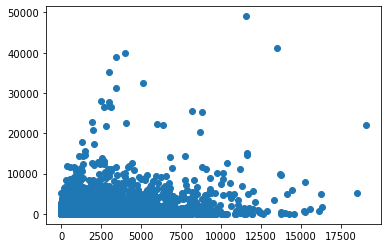

In [8]:
#VISUALISASI PERSEBARAN DATA
plt.scatter(data.BALANCE, data.PURCHASES)
plt.show()

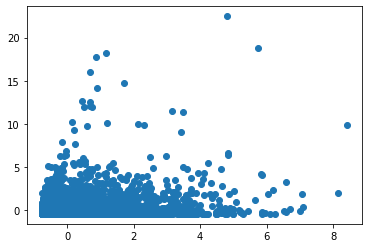

In [9]:
#STANDARISASI
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0],x_scaled[:,1])
plt.show()

In [10]:
#cek sum of square error dari tiap pembagian jumlah cluster
from sklearn.cluster import KMeans
sse = []
index = range (1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i, sse_)

1 17899.999999999967
2 11402.730391779385
3 7545.5457794351405
4 5547.928593290693
5 4317.935495348939
6 3461.59792893223
7 2889.8085296862173
8 2581.5873016371497
9 2296.0650923355033


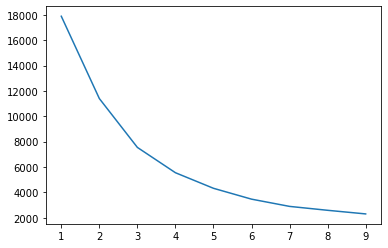

In [11]:
plt.plot(index, sse)
plt.show()

In [12]:
#MEMBUAT MODEL
kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(x_scaled)

KMeans(n_clusters=2, random_state=0)

In [13]:
#MELIHAT CLUSTER PUSAT
kmeans.cluster_centers_

array([[-0.33084893, -0.12611843],
       [ 1.91581111,  0.73030032]])

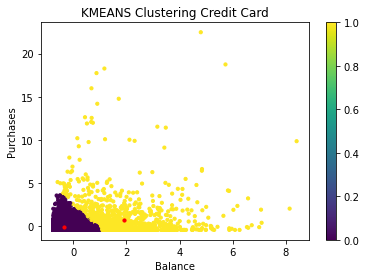

In [14]:
#VISUALISASI PERSEBARAN DATA SETELAH KLASTERING
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10, c=kmeans.labels_)
centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c='red', s=10)
plt.title("KMEANS Clustering Credit Card")
plt.xlabel("Balance")
plt.ylabel("Purchases")
plt.colorbar(output)
plt.show()

In [15]:
#evaluasi model
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

0.943865133581927